# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Eddie Aguilar  |
| **Fecha**      | 27/01/2025  |
| **Expediente** | 739352  |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [2]:
import pandas as pd
data = pd.read_csv("advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**


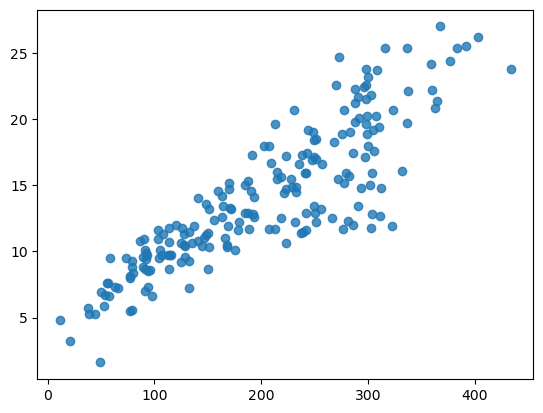

In [3]:
import matplotlib.pyplot as pt 
pt.scatter(x = data["TV"] + data["radio"] + data["newspaper"],
           y = data["sales"],
           alpha = 0.8)
pt.title = "Relaicón entre presupuesto para publicidad y ventas"
           


Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Lo que pasaría sería que si no hay ninguna relación entre el presupuesto que hay para la publicidad y las ventas, no tendría sentido seguir invirtiendo tanto en publicidad. 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Sí, debido a que en base a esos datos podemos generar un modelo y usar las predicciones.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
x = data["TV"]
y = data["sales"]

X = np.reshape(x, [-1, 1])
y = np.reshape(y, [-1, 1])

model.fit(X, y)
ypred = model.predict(X)
print("Regresión lineal: {} + {} x".format(round(model.intercept_[0], 2), round(model.coef_[0][0], 2)))
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

Regresión lineal: 7.03 + 0.05 x


### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población son todos los datos de la prueba que se está haciendo, sin embargo, no siempre se tiene toda la población, o es poco efectivo usarla. Por lo tanto, usamos una muestra, la cual es una parte de la población que replique los mismos comportamientos.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Al hacerlo con la población tus features estimados son en realidad los features correctos que demuestra la relación entre tus variables, mientras que con una muestra solo es un estimado que puede tener errores de muestreo. 

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [5]:
n = len(X)
p = 2 # n of features

rss = np.sum((y - ypred) ** 2)
var = rss / (n - p)
std = np.sum((x - np.average(x)) ** 2)

SE1 = np.sqrt(var / std)
SE0 = np.sqrt(var*((1/n)+((np.average(x)**2)/std)))

print("Error estandar de Coeficiente B0: {}".format(SE0))
print("Error estandar de Coeficiente B1: {}".format(SE1))


Error estandar de Coeficiente B0: 0.4578429402734785
Error estandar de Coeficiente B1: 0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [6]:
range1 = [b1-(SE1*2), b1+(SE1*2)]
range0 = [b0-(SE0*2), b0+(SE0*2)]

print("Intervalo de confianza para el coeficiento B0: {}".format(range0))
print("Intervalo de confianza para el coeficiento B1: {}".format(range1))

Intervalo de confianza para el coeficiento B0: [6.116907668580736, 7.94827942967465]
Intervalo de confianza para el coeficiento B1: [0.042155426057426025, 0.0529178548086135]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

En terminos generales, la prueba de hiótesis nos sive para comparar dos diferentes versiones o instancias de una misma situación, donde quieres comparar ambas para ver si hay diferencia en ciertos valores.  

Siempre tendremos una hipótesis nula la cual nos dice que ambos valores en realidad si se pueden definir como iguales. Y en el caso de la hipótesis alternativa, como su nombre lo dice, es lo contrario o alternativa a que sean iguales (son diferentes con cierta significancia).

En este caso, la hipótesis nula dice que nuestra Beta estimada 1 es igual a 0 lo cual nos diría que no hay relación entre X y Y. De la misma forma, la hipótesis alternativa diced que no es igual a 0, por lo tanto, sí hay realción entre X y Y.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [7]:
t0 = (b0 - 0)/SE0
t1 = (b1 - 0)/SE1
print("Estadístico de Beta 0: {}".format(t0))
print("Estadístico de Beta 1: {}".format(t1))

Estadístico de Beta 0: 15.360275174117543
Estadístico de Beta 1: 17.66762560087555


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [8]:
from scipy import stats

p0 = 2*(1 - stats.t.cdf(np.abs(t0), n-p))
p1 = 2*(1 - stats.t.cdf(np.abs(t1), n-p))
print("p-value de beta 0: {}".format(p0))
print("p-value de beta 1: {}".format(p1))

p-value de beta 0: 0.0
p-value de beta 1: 0.0


¿Se rechaza la hipótesis nula? ¿Qué significa?

Sí, se rechaza la hipótesis nula ya que el pvalue es muy bajo, lo cual significa que las betas en realidad no son iguales a 0 y nos dice que probablemente sí haya relación entre X y Y.

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## Regresión lineal Periodico - Ventas

### Coeficientes estimados

In [ ]:
x = data["newspaper"]
y = data["sales"]

X = np.reshape(x, [-1, 1])
y = np.reshape(y, [-1, 1])



## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [9]:
data.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*